### Dataset Information
Additional Information

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region. 

The period from June 2012 to September 2012. 
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.

### Variable Information
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations 
2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90 
4. Ws :Wind speed in km/h: 6 to 29 
5. Rain: total day in mm: 0 to 16.8
FWI Components  
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 
8. Drought Code (DC) index from the FWI system:  7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely   â€œFireâ€ and â€œnot Fireâ€

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


In [3]:
df=pd.read_csv('fire.csv',header=1)

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [6]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,246,245,245,245,245,245,245,245,245,245,245,245,245,244
unique,33,5,2,20,63,19,40,174,167,199,107,175,128,9
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [7]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [8]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [9]:
df.loc[:122,"region"]=0
df.loc[122:,"region"]=1

In [25]:
df.isnull().sum()

Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [33]:
df[["region"]]=df[["region"]].astype(int)

In [34]:
df.dtypes

Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
region          int64
dtype: object

In [38]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [39]:
for i in objects:
    if i!= 'Classes':
        df[i]=df[i].astype(float)
    

In [40]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [41]:
df=df.dropna().reset_index(drop=True)

In [42]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [43]:
df.iloc[[122]]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,32.0,71.0,12.0,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [44]:
df=df.drop(122).reset_index(drop=True)

In [45]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
237,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
238,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
239,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
240,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [46]:
df.columns=df.columns.str.strip()

In [47]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region'],
      dtype='object')

In [49]:
df[['Temperature','RH','Ws']]=df[['Temperature','RH','Ws']].astype(int)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  242 non-null    int64  
 1   RH           242 non-null    int64  
 2   Ws           242 non-null    int64  
 3   Rain         242 non-null    float64
 4   FFMC         242 non-null    float64
 5   DMC          242 non-null    float64
 6   DC           242 non-null    float64
 7   ISI          242 non-null    float64
 8   BUI          242 non-null    float64
 9   FWI          242 non-null    float64
 10  Classes      242 non-null    object 
 11  region       242 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 22.8+ KB


#### Convert the remaining the datatype to float except Classes 

In [51]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [52]:
df['Classes'].value_counts()

fire             131
not fire         100
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [57]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [58]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [60]:
df['Classes'].value_counts()

1    137
0    105
Name: Classes, dtype: int64

/tmp/ipykernel_91/1203768356.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


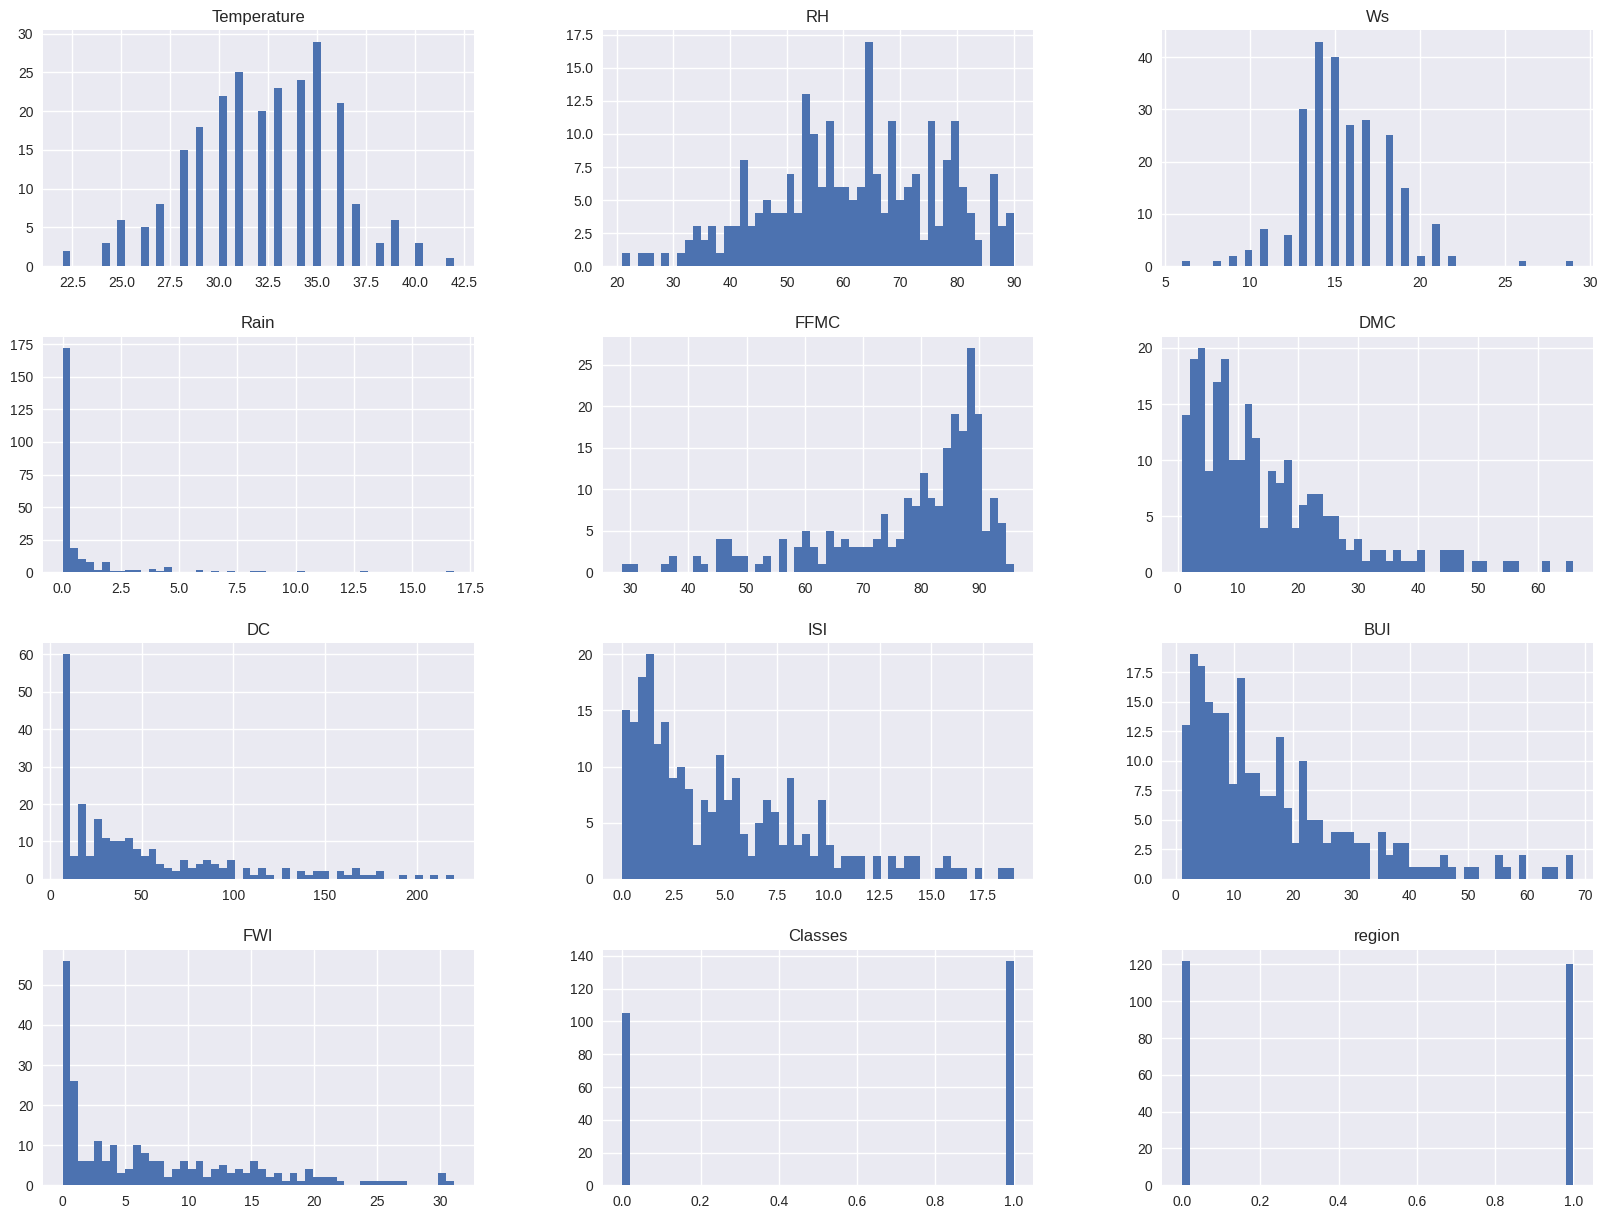

In [61]:
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

In [63]:
percentage=df['Classes'].value_counts(normalize=True)*100

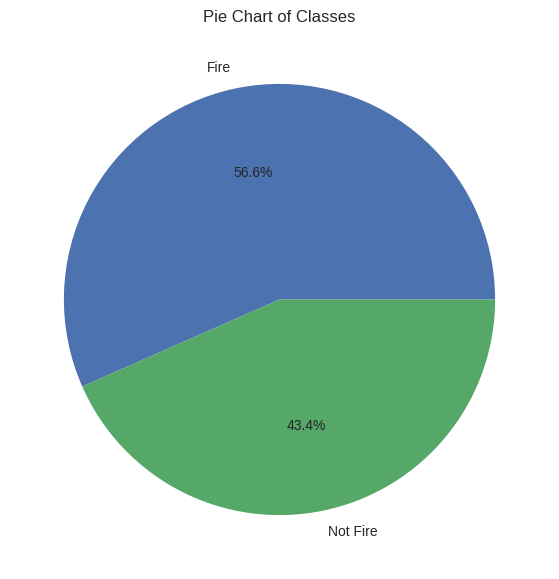

In [64]:
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

In [65]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
Temperature,1.000000,-0.651791,-0.285644,-0.326499,0.679270,0.486494,0.376720,0.604948,0.460533,0.567506,0.517203,0.270295
RH,-0.651791,1.000000,0.248148,0.222604,-0.644536,-0.407180,-0.225293,-0.686103,-0.352357,-0.580109,-0.430794,-0.406348
Ws,-0.285644,0.248148,1.000000,0.171896,-0.175324,-0.005819,0.075031,0.003408,0.026542,0.027768,-0.076262,-0.176928
Rain,-0.326499,0.222604,0.171896,1.000000,-0.546470,-0.289482,-0.298600,-0.348334,-0.300574,-0.325112,-0.380263,-0.039965
FFMC,0.679270,-0.644536,-0.175324,-0.546470,1.000000,0.601527,0.505185,0.738754,0.589881,0.689822,0.768069,0.229726
DMC,0.486494,-0.407180,-0.005819,-0.289482,0.601527,1.000000,0.875511,0.679150,0.982178,0.875405,0.583760,0.196981
DC,0.376720,-0.225293,0.075031,-0.298600,0.505185,0.875511,1.000000,0.506897,0.941809,0.738663,0.509202,-0.075412
ISI,0.604948,-0.686103,0.003408,-0.348334,0.738754,0.679150,0.506897,1.000000,0.642650,0.922613,0.733978,0.268456
BUI,0.460533,-0.352357,0.026542,-0.300574,0.589881,0.982178,0.941809,0.642650,1.000000,0.857449,0.584762,0.093849
FWI,0.567506,-0.580109,0.027768,-0.325112,0.689822,0.875405,0.738663,0.922613,0.857449,1.000000,0.718067,0.201695


<AxesSubplot: >

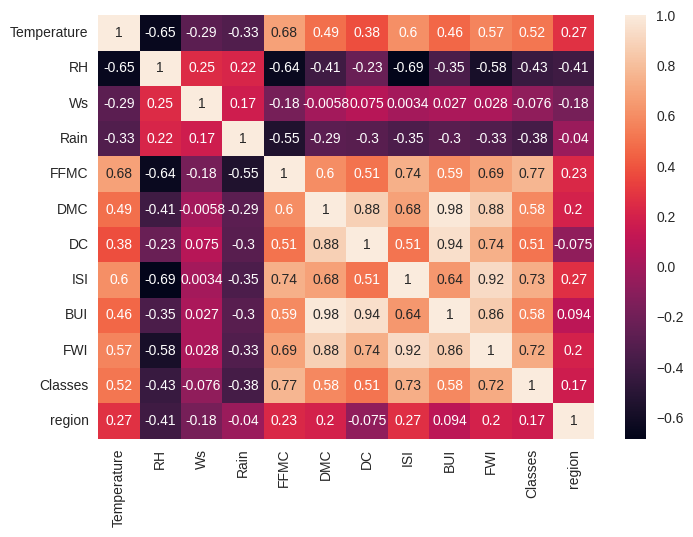

In [66]:
sns.heatmap(df.corr(),annot=True)

In [88]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [69]:
X=df.iloc[:,:-3]

In [73]:
X['Classes']=df['Classes']
X['region']=df['region']

In [74]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
237,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
238,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
239,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
240,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [75]:
y=df['FWI']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [77]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
147,36,55,15,0.0,89.1,20.9,43.3,8.0,20.8,1,1
225,28,81,15,0.0,84.6,12.6,41.5,4.3,14.3,1,1
65,34,65,13,0.0,86.8,11.1,29.7,5.2,11.5,1,0
168,34,58,16,0.0,88.1,27.8,61.1,7.3,27.7,1,1
205,34,40,18,0.0,92.1,56.3,157.5,14.3,59.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0,0
14,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0,0
92,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0,0
179,36,56,16,0.0,88.9,23.8,57.1,8.2,23.8,1,1


In [78]:
y_train

147    12.0
225     5.7
65      6.1
168    13.0
205    31.1
       ... 
106     0.0
14      0.1
92      0.1
179    13.2
102     0.3
Name: FWI, Length: 162, dtype: float64

In [79]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.652760,-0.323028,-0.316076,0.692134,0.481198,0.362712,0.600313,0.452544,0.516943,0.252063
RH,-0.652760,1.000000,0.222924,0.212202,-0.619391,-0.403496,-0.235056,-0.706684,-0.353359,-0.419665,-0.374960
Ws,-0.323028,0.222924,1.000000,0.207954,-0.142731,0.024947,0.128892,0.016075,0.064646,-0.029272,-0.242902
Rain,-0.316076,0.212202,0.207954,1.000000,-0.532193,-0.284058,-0.297935,-0.342964,-0.295246,-0.382222,-0.060157
FFMC,0.692134,-0.619391,-0.142731,-0.532193,1.000000,0.624832,0.538846,0.755357,0.613900,0.785702,0.217877
DMC,0.481198,-0.403496,0.024947,-0.284058,0.624832,1.000000,0.877533,0.685357,0.984027,0.616921,0.185051
DC,0.362712,-0.235056,0.128892,-0.297935,0.538846,0.877533,1.000000,0.540066,0.946949,0.548744,-0.088816
ISI,0.600313,-0.706684,0.016075,-0.342964,0.755357,0.685357,0.540066,1.000000,0.651940,0.753476,0.267916
BUI,0.452544,-0.353359,0.064646,-0.295246,0.613900,0.984027,0.946949,0.651940,1.000000,0.613194,0.087218
Classes,0.516943,-0.419665,-0.029272,-0.382222,0.785702,0.616921,0.548744,0.753476,0.613194,1.000000,0.147730


In [80]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [81]:
corr_features=correlation(X_train,0.85)

In [82]:
corr_features

{'BUI', 'DC'}

In [83]:
X_train.drop(corr_features,inplace=True,axis=1)
X_test.drop(corr_features,inplace=True,axis=1)

In [84]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

<AxesSubplot: >

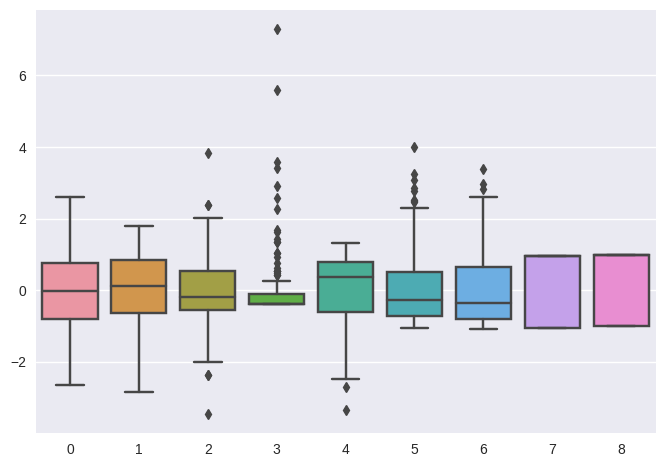

In [85]:
sns.boxplot(data=X_train)

### Linear Regression Model


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
reg=LinearRegression()
reg.fit(X_train,y_train)
y_pred=reg.predict(X_test)
score=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mae,score

(0.6581179311188505, 0.9808901726434271)

### Lasso Regression

In [118]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred=lasso.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mae,score

(0.4925925925925926, -0.06902090441185083)

In [119]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mae,score

(0.25924801878233517, 0.5964900929753916)

In [120]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train,y_train)
y_pred=elastic.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
mae,score

(0.4925925925925926, -0.06902090441185083)